## Load the test features

In [1]:
import pandas as pd
from scipy import sparse
features_test = sparse.load_npz("/code/data/features/tfidf_test.npz")
y_test = pd.read_csv("/code/data/test.csv")['is_sarcastic']

## Load the model

In [2]:
import pickle
with open('/code/models/model.1.0.0.pickle', 'rb') as file:
    pickle_model = pickle.load(file)

## Infer data  

In [4]:
pred = pickle_model.predict(features_test)

## Results

In [5]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.8503144654088051

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3707
           1       0.85      0.83      0.84      3448

    accuracy                           0.85      7155
   macro avg       0.85      0.85      0.85      7155
weighted avg       0.85      0.85      0.85      7155



## Other metrics

In [13]:
metrics.confusion_matrix(y_test, pred)

array([[3205,  502],
       [ 569, 2879]])

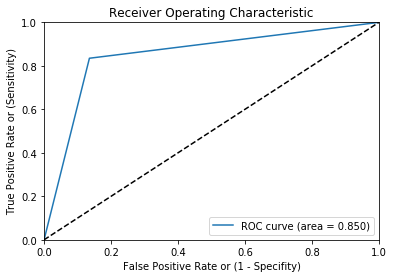

In [11]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score


# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")